###### To solve a puzzle, you are given an initial state and a goal state.
###### Target is to reach goal state from initial state using puzzle rules.
######  We can move blank tile only on left, right, up, and down
![Capture.JPG](attachment:Capture.JPG)

# Generate an intial state of NPuzzle

In [ ]:
import numpy as np
import random
import math

In [ ]:
def get_state():
    N = random.choice([3,4,5])
    state = list(range(0,N*N))
    random.shuffle(state)
    print(np.array(state).reshape(N,N))
    return state

In [ ]:
def get_dim(s):
  return int(math.sqrt(len(s)))

In [ ]:
s = get_state()
print(s)
print('Dimension:', get_dim(s))

[[7 3 5]
 [1 8 0]
 [6 4 2]]
[7, 3, 5, 1, 8, 0, 6, 4, 2]
Dimension: 3


# Calculate inversion

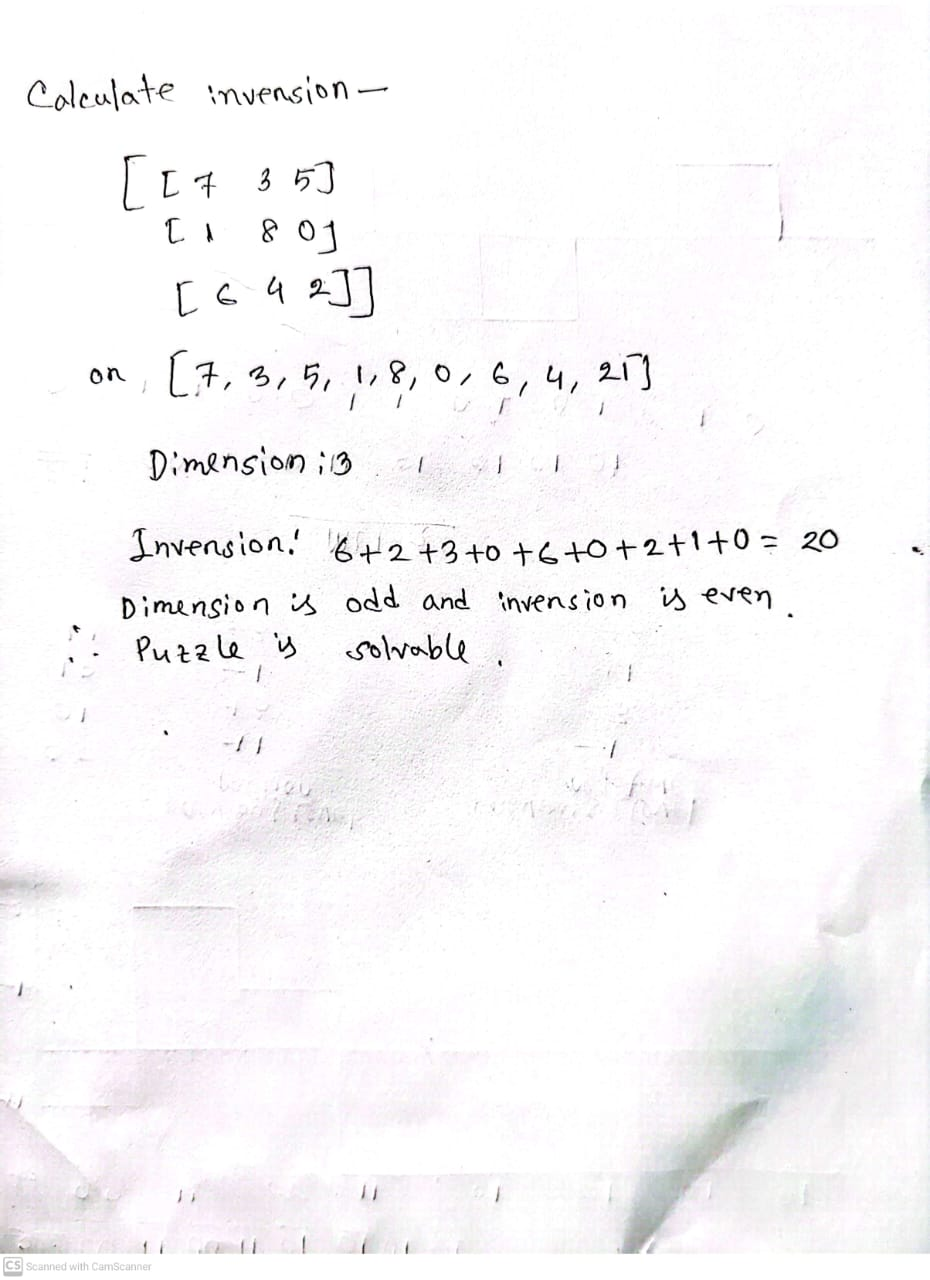Inversion is a pair of tiles that are in the reverse order from where they ought to be. In our case, the bigger number is in front of the smaller one.



In [ ]:
def get_invCount(s):
    count = 0
    for i in range(len(s)):
        for j in range(i+1,len(s)): #Iterates over elements after the current element
            if s[j]!=0 and s[i] > s[j]: count += 1
    return count

In [ ]:
s = get_state()
print(s)
print(get_invCount(s))

[[ 5 14  3  0]
 [ 2 10  6  7]
 [15 12 11  9]
 [ 4  8  1 13]]
[5, 14, 3, 0, 2, 10, 6, 7, 15, 12, 11, 9, 4, 8, 1, 13]
50


In [ ]:
s.index(0)

17

# **Find blank row**

In [ ]:
# find row position of the blank tile
def get_blank_row(s):
    dim = get_dim(s)
    blank_index = s.index(0)#Finds the index of the blank tile (0) in the grid state s.
    row_position_from_bottom = dim - 1 - blank_index // dim
    return row_position_from_bottom

In [ ]:
s = get_state()
print(s)
print('Blank tile row position:', get_blank_row(s))

[[3 8 4]
 [0 7 1]
 [2 5 6]]
[3, 8, 4, 0, 7, 1, 2, 5, 6]
Blank tile row position: 1


# Solvability Rules

In [ ]:
# apply the rules to decide solvability
#  N, I, R
# define a method to return solvability (input S)
# return True if solvable or False if not

def isSolvable(state):
  N = get_dim(state)
  I = get_invCount(state)
  R = get_blank_row(state)

# decide solvability
# check rules

  if N % 2 != 0:  # Odd dimension
     return I % 2 == 0
  else:  # Even dimension
     return (I + R) % 2 != 0


  return False



In [ ]:
s = get_state()
print(s)
print(isSolvable(s))


[[6 5 7]
 [4 2 1]
 [8 3 0]]
[6, 5, 7, 4, 2, 1, 8, 3, 0]
True


In [ ]:
s = get_state()
while(isSolvable(s)==False):
  s = get_state()
print(s)


[[6 5 2]
 [4 7 3]
 [8 0 1]]
[6, 5, 2, 4, 7, 3, 8, 0, 1]
